<a href="https://colab.research.google.com/github/BountyHunter1999/Learning-PyTorch-Notebooks/blob/main/9_CNN_CIFAR10_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
transformer_train = torchvision.transforms.Compose([
                                                    # torchvision.transforms.ColorJitter(
                                                    #     brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
                                                    transforms.RandomCrop(32, padding=4),
                                                    torchvision.transforms.RandomHorizontalFlip(p=0.5),
                                                    # torchvision.transforms.RandomRotation(degree=15),
                                                    torchvision.transforms.RandomAffine(0, translate=(0.1, 0.1)),
                                                    # torchvision.transforms.RandomPerspective(),
                                                    transforms.ToTensor(),
])

In [3]:
train_dataset = torchvision.datasets.CIFAR10(
    root=".",
    train=True,
    # transform=transforms.ToTensor(),
    transform=transformer_train,
    download=True
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [4]:
test_dataset = torchvision.datasets.CIFAR10(
    root=".",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

Files already downloaded and verified


In [5]:
# behaves differently from MNIST/ Fashion MNIST
# it is a Numpy array
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
# we are working with color image now
train_dataset.data.shape

(50000, 32, 32, 3)

In [7]:
# behave differently from MNIST / Fashion MNIST
# it is a list!
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [8]:
# number of classes
K = len(set(train_dataset.targets))
print("Number of classes:", K)

Number of classes: 10


In [9]:
# Data Loader
# Useful because it automatically generates batches in the training loop
# and takes care of shuffling

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [10]:
# the data transformer mapped the data to (0, 1)
# and also moved the color channel before height/width
# pytorch hides this detail by making us use special dataloader and dataset function
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=1,
                                         shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.7686, 0.5961, 0.4549],
          [0.0000, 0.0000, 0.0000,  ..., 0.8627, 0.7765, 0.4588],
          [0.0000, 0.0000, 0.0000,  ..., 0.9961, 0.9412, 0.7137],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.6941, 0.6784, 0.7255],
          [0.0000, 0.0000, 0.0000,  ..., 0.6588, 0.6588, 0.6549],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.7804, 0.6118, 0.4784],
          [0.0000, 0.0000, 0.0000,  ..., 0.8706, 0.7922, 0.4863],
          [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.9569, 0.7412],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.6706, 0.6549, 0.6863],
          [0.0000, 0.0000, 0.0000,  ..., 0.6314, 0.6235, 0.6157],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.7843, 0.6157, 0.4588],
          [0.0000, 0.0000, 0.0000,  ..., 0.8745, 0.7961, 0.4706],
          [0.0000, 0.0000, 0.0000,  ..., 1

In [14]:
# Define the model
# Define the model
# class CNN(nn.Module):
#   def __init__(self, x):
#     super(CNN, self).__init__()

#     # define the conv layers
#     self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2)
#     self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
#     self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)

#     # define the linear layers
#     self.fc1 = nn.Linear(128 * 3 * 3, 1024)
#     self.fc2 = nn.Linear(1024, K)

#   def forward(self, x):
#     x = F.relu(self.conv1(x))
#     x = F.relu(self.conv2(x))
#     x = F.relu(self.conv3(x)) 
#     x = x.view(-1, 128 * 3 * 3)
#     x = F.dropout(x, p=0.5)
#     x = F.relu(self.fc1(x))
#     x = F.dropout(x, p=0.2)
#     x = self.fc2(x)
#     return x

class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()

    # define the conv layers
    self.conv1 = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2),
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2),
    )
    self.conv3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Conv2d(128, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2),
    )

    # to get the same size output as the input
    # H_out = H_in + 2p - 2 -> p = 1 if H_out = H_in

    # Easy to calculate output
    # 32 > 16 > 8 > 4

    # define the linear layers
    self.fc1 = nn.Linear(128 * 4 * 4, 1024)
    self.fc2 = nn.Linear(1024, K)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = x.view(x.size(0), -1)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x

In [15]:
128*3*3

1152

In [16]:
# Instantiate the model
# model = CNN(K)
model = CNN(K)

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel

In [18]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [19]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data into GPU if available
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs) # calls the forward function
      loss = criterion(outputs, targets)

      # Backward and optimize
      loss.backward()
      optimizer.step()

      # train_loss over each iteration
      train_loss.append(loss.item())

    # Get train and test loss
    # this mean gives the train_loss over a epoch
    train_loss = np.mean(train_loss) # a little misleading

    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item()) # iteration test loss
    test_loss = np.mean(test_loss) # epochs test loss

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f'Epoch: {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
    
  return train_losses, test_losses

In [21]:
# train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=15)
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=80)

Epoch: 1/80, Train Loss: 1.1556,       Test Loss: 1.0621, Duration: 0:00:25.548179
Epoch: 2/80, Train Loss: 0.9459,       Test Loss: 0.9175, Duration: 0:00:24.782083
Epoch: 3/80, Train Loss: 0.8160,       Test Loss: 0.7629, Duration: 0:00:24.821160
Epoch: 4/80, Train Loss: 0.7324,       Test Loss: 0.7048, Duration: 0:00:25.739810
Epoch: 5/80, Train Loss: 0.6760,       Test Loss: 0.6752, Duration: 0:00:26.688381
Epoch: 6/80, Train Loss: 0.6304,       Test Loss: 0.6226, Duration: 0:00:25.630574
Epoch: 7/80, Train Loss: 0.5922,       Test Loss: 0.6280, Duration: 0:00:24.869420
Epoch: 8/80, Train Loss: 0.5676,       Test Loss: 0.6128, Duration: 0:00:25.146436
Epoch: 9/80, Train Loss: 0.5391,       Test Loss: 0.5711, Duration: 0:00:26.052772
Epoch: 10/80, Train Loss: 0.5164,       Test Loss: 0.5770, Duration: 0:00:24.834354
Epoch: 11/80, Train Loss: 0.5065,       Test Loss: 0.5604, Duration: 0:00:25.147617
Epoch: 12/80, Train Loss: 0.4874,       Test Loss: 0.5381, Duration: 0:00:25.174258
E

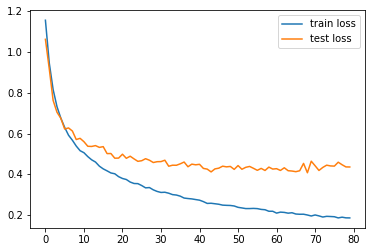

In [22]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [23]:
# Accuracy 

n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction 
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1) # max_values and its argument

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9393, Test acc: 0.8697


In [24]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  """
  This Function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = ".2f" if normalize  else "d"
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

Confusion matrix, without normalization
[[900   6  20   6   3   2   6   5  36  16]
 [  9 906   2   3   0   1   4   0   7  68]
 [ 31   2 810  36  35  24  33  19   6   4]
 [ 25   3  30 739  25  99  42  23   5   9]
 [ 10   2  32  38 855  22  14  26   0   1]
 [ 10   0  24  97  14 803  13  31   1   7]
 [  6   3  19  28   3  13 918   4   2   4]
 [ 14   2  10  17  10  22   5 915   0   5]
 [ 36  14   4   6   0   0   3   2 924  11]
 [ 22  19   0   6   2   4   0   2  17 928]]


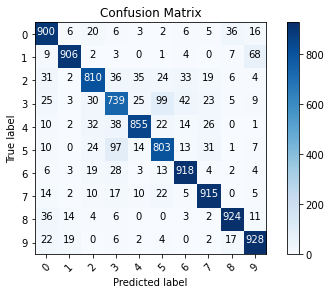

In [25]:
# get all predictions in an array and plot confusion matrix
x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [26]:
# label mapping
labels = """airplane
        automobile
        bird
        cat
        deer
        dog
        frog
        horse
        ship
        truck""".split()

Text(0.5, 1.0, 'True label: cat Predicted: dog')

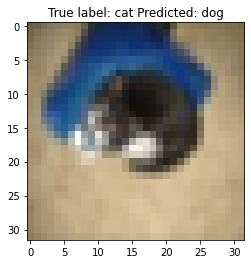

In [27]:
# Show some misclassified examples
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, 3))
plt.title(f"True label: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}")

# Experiment with:(some way to improve your results and hyperparameter optimization)
1. What happens when we don't  have data augmentation
2. when we don't have batch norm
3. when we remove one layer of convolution

In [28]:
from torchsummary import summary
summary(model, (3, 32, 32))
# filter is 3i/p channels * (3 * 3)size * 32o/p channels + bias terms(vector of size 32) = 896

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6